In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torchvision.transforms as transforms

from video_dataset import VideoDataset

DATA_PATH = 'D:\dfdc'
NUM_PARTS = 50

DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {DEVICE} device")

BATCH_SIZE = 3

Using cuda device


In [2]:
def process_video(video: torch.Tensor) -> torch.Tensor:
  # video is in the shape (T, H, W, C), convert to (T, C, H, W) for cropping
  video = video.permute(0, 3, 1, 2)
  video = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.Lambda(lambda x: torch.narrow(x, 0, 0, 180))
  ])(video)

  # convert back to (T, H, W, C)
  video = video.permute(0, 2, 3, 1)

  return video

In [3]:
# Test the VideoDataset
loader = DataLoader(
  VideoDataset(DATA_PATH, 'train', transform=process_video), 
  batch_size=BATCH_SIZE, 
  shuffle=True)

tensor([0, 1, 1])


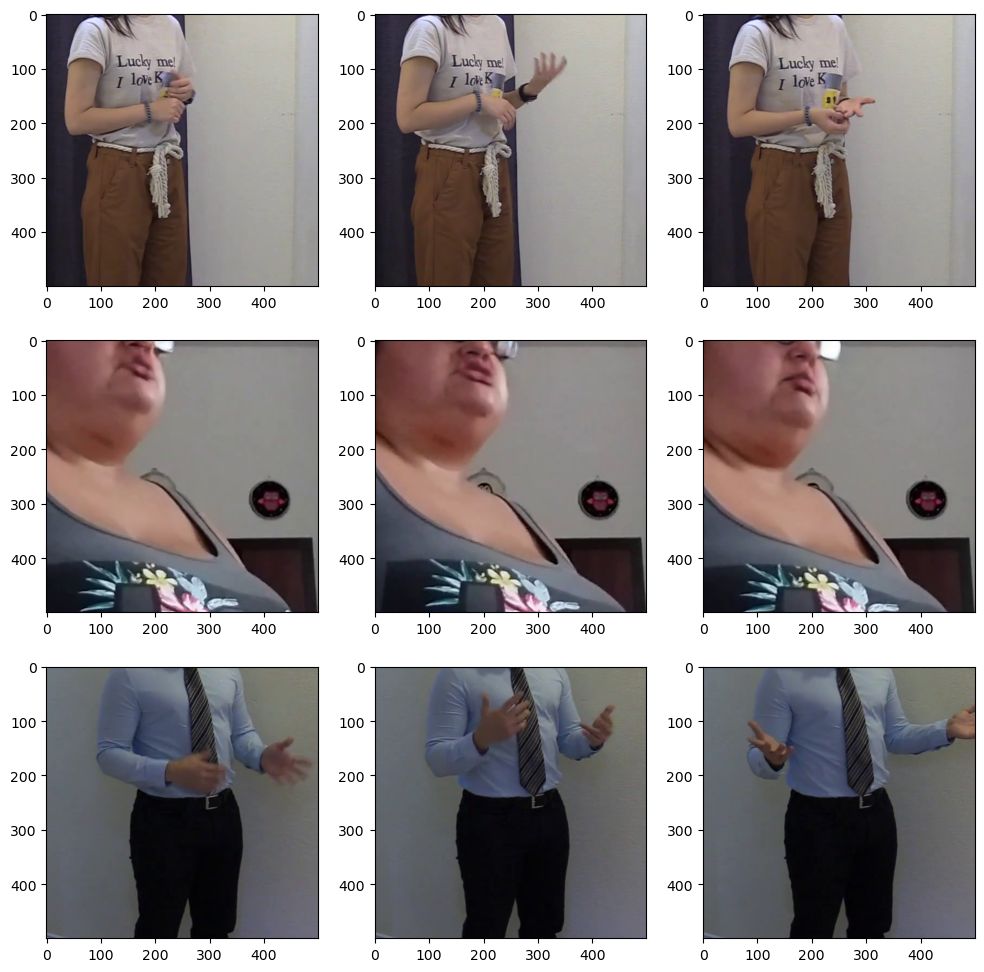

In [4]:
from matplotlib import pyplot as plt

# Get some images & labels from the data loader

data, label = next(iter(loader))

# data dimensions are BxTxCxHxW

fig = plt.figure(figsize=(12, 12))

for i in range(BATCH_SIZE):
  video = data[i]

  fig.add_subplot(BATCH_SIZE, 3, BATCH_SIZE*i + 1)
  plt.imshow(video[0])
  fig.add_subplot(BATCH_SIZE, 3, BATCH_SIZE*i + 2)
  plt.imshow(video[100])
  fig.add_subplot(BATCH_SIZE, 3, BATCH_SIZE*i + 3)
  plt.imshow(video[-1])

print(label)
